In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')  # ignore all warnings

sns.set(style="whitegrid")


In [2]:
# Load dataset 
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)


In [9]:
# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = np.where(df['FamilySize'] == 0, 1, 0)

# Bin Age into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[0, 1, 2, 3, 4])

# Bin Fare into 4 quartiles
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])


In [11]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)


In [13]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()


,Pclass,Sex,SibSp,Parch,Embarked,Survived,FamilySize,IsAlone,AgeGroup,FareBand
0,3,0,1,0,0,0,1,0,2,0
1,1,1,1,0,1,1,1,0,3,3
2,3,1,0,0,0,1,0,1,2,1
3,1,1,1,0,0,1,1,0,2,3
4,3,0,0,0,0,0,0,1,2,1


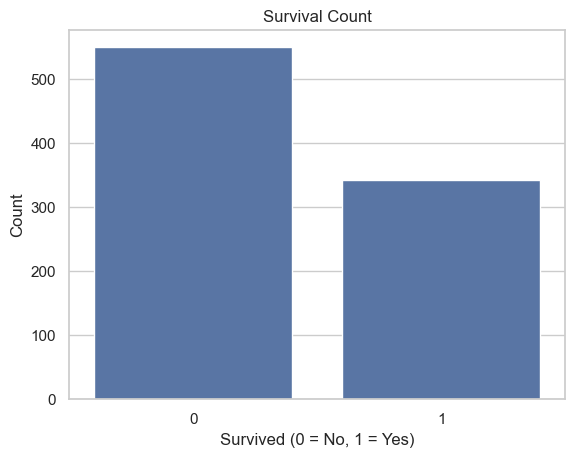

In [15]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


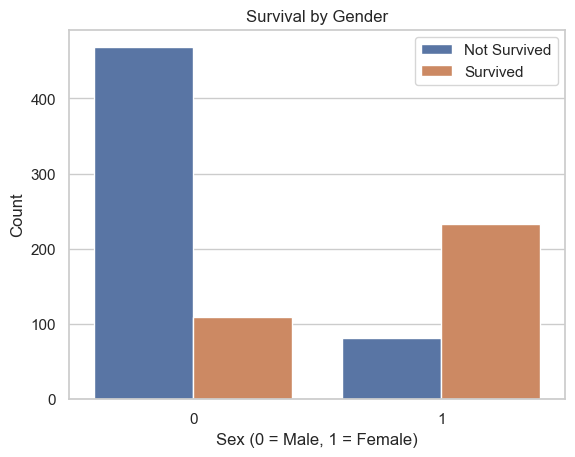

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


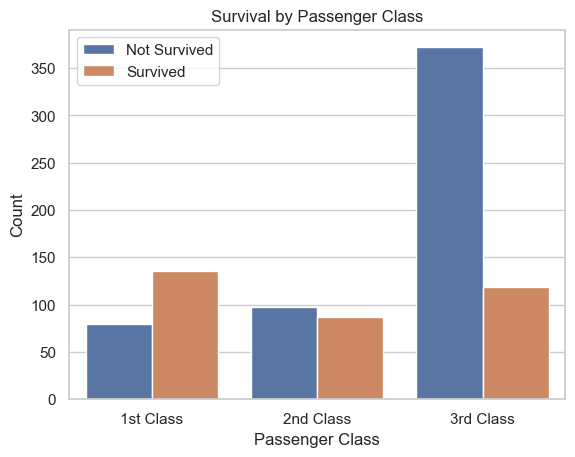

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(['Not Survived', 'Survived'])
plt.show()


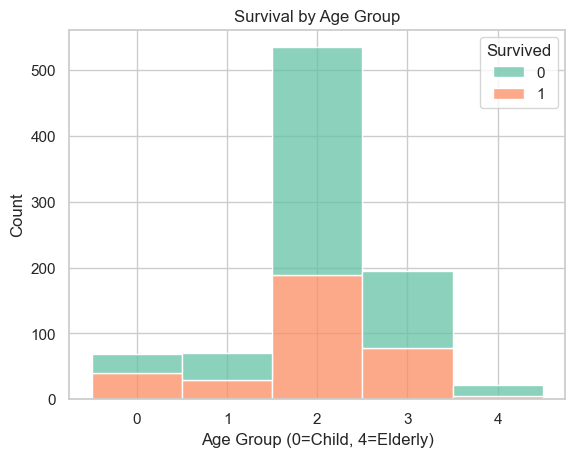

In [21]:
sns.histplot(data=df, x='AgeGroup', hue='Survived', multiple='stack', palette='Set2')
plt.title('Survival by Age Group')
plt.xlabel('Age Group (0=Child, 4=Elderly)')
plt.show()


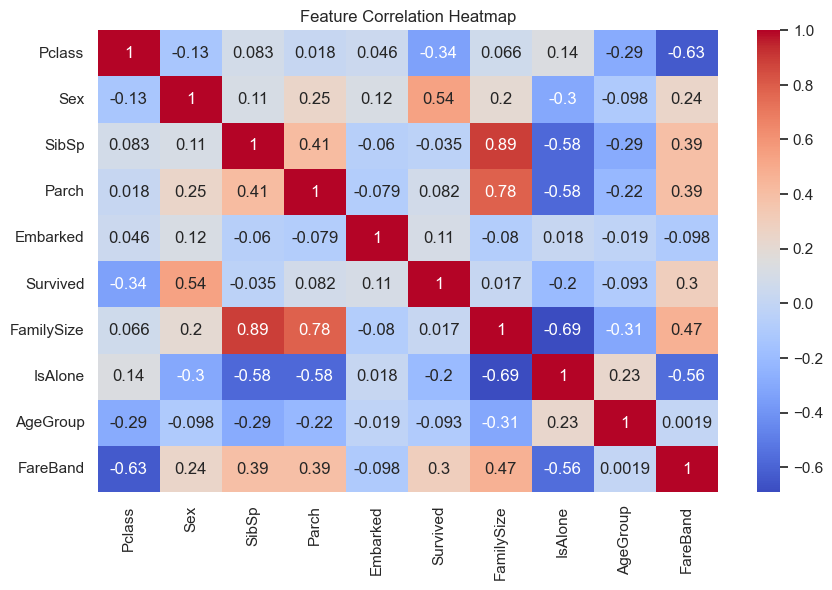

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [25]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [29]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 78.77 %

📉 Confusion Matrix:
 [[77 28]
 [10 64]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       105
           1       0.70      0.86      0.77        74

    accuracy                           0.79       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.79      0.79       179



In [31]:
def get_input_and_predict():
    print("🎯 Enter Passenger Details for Survival Prediction:\n")
    
    try:
        pclass = int(input("Pclass (1=1st, 2=2nd, 3=3rd): "))
        sex = int(input("Sex (0=Male, 1=Female): "))
        sibsp = int(input("Number of siblings/spouse aboard (SibSp): "))
        parch = int(input("Number of parents/children aboard (Parch): "))
        embarked = int(input("Embarked (0=S, 1=C, 2=Q): "))
        age_group = int(input("Age Group (0=Child, 1=Teen, 2=Young Adult, 3=Adult, 4=Elderly): "))
        fare_band = int(input("Fare Band (0=Low Fare, 3=High Fare): "))
        
        family_size = sibsp + parch
        is_alone = 1 if family_size == 0 else 0

        # Prepare input as DataFrame
        input_data = pd.DataFrame([{
            'Pclass': pclass,
            'Sex': sex,
            'SibSp': sibsp,
            'Parch': parch,
            'Embarked': embarked,
            'FamilySize': family_size,
            'IsAlone': is_alone,
            'AgeGroup': age_group,
            'FareBand': fare_band
        }])

        # Scale and predict
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)

        print("\n🔮 Prediction Result:")
        print("✅ Survived" if prediction[0] == 1 else "❌ Did NOT Survive")

    except Exception as e:
        print("⚠️ Invalid input. Please enter numbers only. Error:", e)

# Run the prediction function
get_input_and_predict()


🎯 Enter Passenger Details for Survival Prediction:



Pclass (1=1st, 2=2nd, 3=3rd):  1
Sex (0=Male, 1=Female):  1
Number of siblings/spouse aboard (SibSp):  3
Number of parents/children aboard (Parch):  1
Embarked (0=S, 1=C, 2=Q):  0
Age Group (0=Child, 1=Teen, 2=Young Adult, 3=Adult, 4=Elderly):  2
Fare Band (0=Low Fare, 3=High Fare):  3



🔮 Prediction Result:
❌ Did NOT Survive
